In [124]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import scraper
import pickle
from pprint import pprint
from sklearn.preprocessing import MinMaxScaler

In [125]:
def priceChanges(prices):
    absChange = [0]*(len(prices)-1)
    percChange = [0]*(len(prices)-1)
    for i in range(0,len(prices)-1):
        absChange[i] = prices[i+1]-prices[i]
        percChange[i] = absChange[i]/prices[i]
    return absChange,percChange

def marginChanges(prices,buylimit):
    absChange = [0]*(len(prices)-1)
    percChange = [0]*(len(prices)-1)
    for i in range(0,len(prices)-1):
        absChange[i] = prices[i+1]*buylimit-prices[i]*buylimit
        percChange[i] = absChange[i]/(prices[i]*buylimit)
    return absChange,percChange

In [126]:
itemInfo = scraper.loadItemInfo()

In [127]:
# calculate high alch items
natPrice = scraper.getExchangeInfo('Nature_rune')['price']
profits = []
for item in itemInfo:
    try:
        #print(int(item['exchangePrice'])+natPrice,int(item['highAlch']))
        exPrice = int(itemInfo[item]['exchangePrice'])
        alchPrice = int(itemInfo[item]['highAlch'])
        if exPrice!=-1 and exPrice+natPrice < alchPrice:
            #print(item)
            buyLimit = int(itemInfo[item]['buyLimit'])
            profits.append((itemInfo[item]['name'],alchPrice/(exPrice+natPrice)))
    except ValueError:
        pass
def getKey(item):
    return item[1]
profits.sort(key=getKey,reverse=True)
pprint(profits[:10])

[('Redwood_shield', 1.1671732522796352),
 ('Cyclops_head', 1.1372251705837755),
 ('Snakeskin_shield', 1.0760233918128654),
 ('Zombie_head', 1.0582010582010581),
 ('Mithril_2h_sword', 1.0576271186440678),
 ('Mithril_pickaxe', 1.0441767068273093),
 ('Mithril_kiteshield', 1.0424528301886793),
 ('Snakeskin_chaps', 1.0382916053019147),
 ("Black_d'hide_body", 1.0373220469411313),
 ('Mithril_platebody', 1.0348258706467661)]


In [128]:
itemPrices = scraper.loadItemPrices()

In [129]:
# check length of available datasets
sizes = {}
for item in itemPrices:
    l = len(itemPrices[item])
    if l in sizes:
        sizes[l]+=1
    else:
        sizes[l] = 1
cumSum = 0
cumSums = []
keys = []
for key in sorted(sizes,reverse=True):
    print("%s: %s" % (key, sizes[key]))
    keys.append(key)
    cumSum += sizes[key]
    cumSums.append(cumSum)
cumSums = np.array(cumSums)/cumSum

1346: 1
1342: 107
1341: 353
1340: 9
1339: 31
1338: 27
1337: 21
1336: 13
1335: 28
1334: 23
1333: 8
1332: 5
1331: 7
1330: 2
1329: 8
1328: 4
1327: 9
1326: 7
1325: 5
1324: 4
1323: 5
1322: 3
1321: 4
1320: 491
1319: 52
1318: 104
1317: 90
1316: 108
1315: 78
1314: 76
1313: 101
1312: 34
1311: 61
1310: 45
1309: 36
1308: 41
1307: 57
1306: 60
1305: 23
1304: 45
1303: 26
1302: 19
1301: 21
1300: 18
1299: 26
1298: 12
1297: 15
1296: 11
1295: 15
1294: 14
1293: 8
1292: 21
1291: 8
1290: 17
1289: 17
1288: 12
1287: 7
1286: 14
1285: 14
1284: 4
1283: 13
1282: 11
1281: 9
1280: 6
1279: 7
1278: 3
1277: 4
1276: 11
1275: 9
1274: 12
1273: 8
1272: 8
1271: 3
1270: 1
1269: 5
1268: 6
1267: 4
1266: 4
1265: 4
1264: 2
1263: 4
1262: 5
1261: 5
1260: 5
1259: 8
1258: 2
1257: 5
1256: 3
1255: 3
1254: 7
1252: 4
1251: 3
1250: 1
1249: 1
1248: 4
1247: 4
1246: 2
1245: 2
1244: 13
1243: 1
1242: 3
1241: 3
1240: 3
1239: 2
1238: 6
1237: 2
1236: 10
1235: 4
1234: 2
1233: 2
1232: 3
1231: 4
1230: 8
1229: 7
1228: 1
1227: 2
1226: 1
1224: 8
122

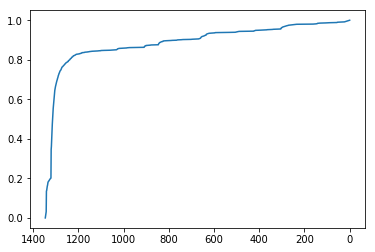

In [130]:
plt.plot(keys,cumSums)
plt.gca().invert_xaxis()

In [131]:
# look at size of quantity data set
sizes = {}
for item in itemPrices:
    l = len([a[2] for a in itemPrices[item] if a[2] > 0])
    if l in sizes:
        sizes[l] +=1
    else:
        sizes[l] = 1
cumSum = 0
cumSums = []
keys = []
for key in sorted(sizes,reverse=True):
    print("%s: %s" % (key, sizes[key]))
    keys.append(key)
    cumSum += sizes[key]
    cumSums.append(cumSum)
cumSums = np.array(cumSums)/cumSum

350: 78
349: 4
346: 2
345: 1
330: 1
325: 1
319: 1
316: 1
306: 1
270: 1
268: 1
243: 1
240: 1
213: 1
191: 2
176: 1
162: 1
157: 1
149: 1
144: 1
136: 1
125: 1
102: 1
96: 1
94: 1
82: 1
80: 1
78: 1
70: 1
69: 1
64: 1
39: 1
37: 1
35: 1
26: 1
24: 1
15: 1
13: 1
12: 1
10: 1
9: 1
7: 1
6: 2
5: 1
4: 2
3: 1
2: 2
1: 2
0: 3256


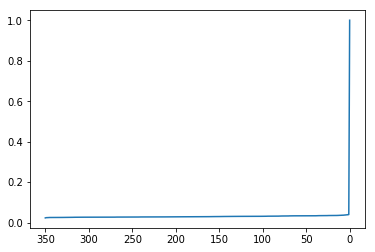

In [132]:
plt.plot(keys,cumSums)
plt.gca().invert_xaxis()

In [133]:
quantItems = []
for item in itemPrices:
    l = len([a[2] for a in itemPrices[item] if a[2] > 0])
    if l>=350:
        quantItems.append(item)

In [134]:
prices = {}
quants = {}
for item in quantItems:
    quant = [a[2] for a in itemPrices[item] if a[2] > 0]
    if len(quant)==350:
        quants[item] = quant
        price = [a[1] for a in itemPrices[item]]
        prices[item] = []
        for i in range(350):
            prices[item].append(price[-350+i])

In [135]:
from sklearn import linear_model

quantItems.sort(key=lambda x: itemPrices[x][-1][1],reverse=True)
scores = {}
for item in quantItems:
    #print(item)
    X = np.array(quants[item][:-1]).reshape(-1, 1)
    y = np.array(prices[item][1:]).reshape(-1, 1)
    
    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    predictions = lm.predict(X)
    scores[item] = lm.score(X,y)
    '''
    print(lm.coef_,lm.intercept_)
    plt.scatter(X,y)
    plt.plot(X,predictions,'r')
    plt.show()
    '''
print(sorted(scores.items(), key=lambda kv: kv[1],reverse=True))

[('Arrow_shaft', 1.0), ('Diamond_bolts_(e)', 0.7033147348087457), ('Yew_longbow', 0.6003011013349271), ('Maple_logs', 0.5724270477587146), ('Law_rune', 0.5428130507589966), ('Mithril_dart', 0.5378718981173018), ('Coal', 0.5055455327299649), ('Maple_longbow_(u)', 0.47647099577402985), ('Magic_longbow', 0.43226131152344827), ('Headless_arrow', 0.41826419599325904), ('Trading_sticks', 0.412860411165321), ('Air_battlestaff', 0.40703135327789786), ('Nature_rune', 0.3596694267505701), ('Grapes', 0.3585064003250237), ('Mithril_arrow', 0.3510571753675682), ('Gold_bar', 0.32172192816523815), ('Cosmic_rune', 0.30997426919873805), ('Death_rune', 0.3019954667642957), ('Oak_plank', 0.28840093013094203), ('Blood_rune', 0.28713423213285943), ('Chaos_rune', 0.28590605097008287), ('Battlestaff', 0.26876142351847077), ('Steel_dart', 0.23842696414253262), ('Bucket_of_sand', 0.22466858437108717), ('Vial', 0.21119263138165903), ('Mithril_bolts', 0.21073250869771687), ('Oak_logs', 0.1889702382244025), ('Ada

In [136]:
viableItems = []
for item in itemPrices:
    if len(itemPrices[item])>1200 and itemPrices[item][-1][1]>10:
        viableItems.append(item)
print(len(viableItems))

2658


In [137]:
#calculate coefficient of variation (measure of volatility)
prices = [a[1] for a in itemPrices['Abyssal_whip']]
print(stats.variation(prices))
print(stats.variation(prices[-90:]))

0.2040466363141862
0.07382062559752733


In [138]:
priceVariances = []
for item in itemPrices:
    prices = [a[1] for a in itemPrices[item]]
    priceVariances.append((stats.variation(prices[-90:]),item))

def getKey(item):
    return item[0]

priceVariances.sort(key=getKey,reverse=True)

/usr/lib64/python3.4/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib64/python3.4/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib64/python3.4/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib64/python3.4/site-packages/scipy/stats/stats.py:1025: RuntimeWarning: Mean of empty slice.
  return a.std(axis) / a.mean(axis)
/usr/lib64/python3.4/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [139]:
pprint(priceVariances[:10])
pprint(priceVariances[-10:])

[(nan, 'Snape_grass_seed'),
 (nan, 'Dragon_knife(p)'),
 (1.2102858685636628, 'Barley_seed'),
 (0.6492062177036483, 'Bronze_warhammer'),
 (0.558641383536844, 'Cod'),
 (0.5211229844332206, 'Iron_javelin'),
 (0.4688386091000646, 'Spinach_roll'),
 (0.44743591607539496, 'Black_elegant_legs'),
 (0.43555424695526485, 'Jangerberries'),
 (0.42768220485744624, 'Empty_fishbowl')]
[(0.0, 'Ugthanki_&_onion'),
 (0.0, "Premade_s'y_crunch"),
 (0.0, 'Hunting_mix(1)'),
 (0.0, 'Oak_kitchen_table'),
 (0.0, "Premade_w'm_batta"),
 (0.0, 'Dust_rune'),
 (0.0, 'Moonlight_mead(m)'),
 (0.0, 'Cider(m4)'),
 (0.0, 'Rock-climbing_boots'),
 (0.0, 'Bronze_hasta(p+)')]


In [140]:
def bollingerBands(data):
    means = []
    stds = []
    for i in range(20,len(data)):
        d = data[i-20:i]
        means.append(np.mean(d))
        stds.append(np.std(d))
    return np.array(means),np.array(stds)

def plotBollingerBands(data,means,stds):
    plt.figure(figsize=(20,10))
    plt.plot(means+2*stds,'r-')
    plt.plot(means+(-2*stds),'r-')
    plt.plot(means,'g--')
    plt.plot(data[20:],'b-')
    plt.show()

In [141]:
itemPrices = scraper.loadItemPrices()

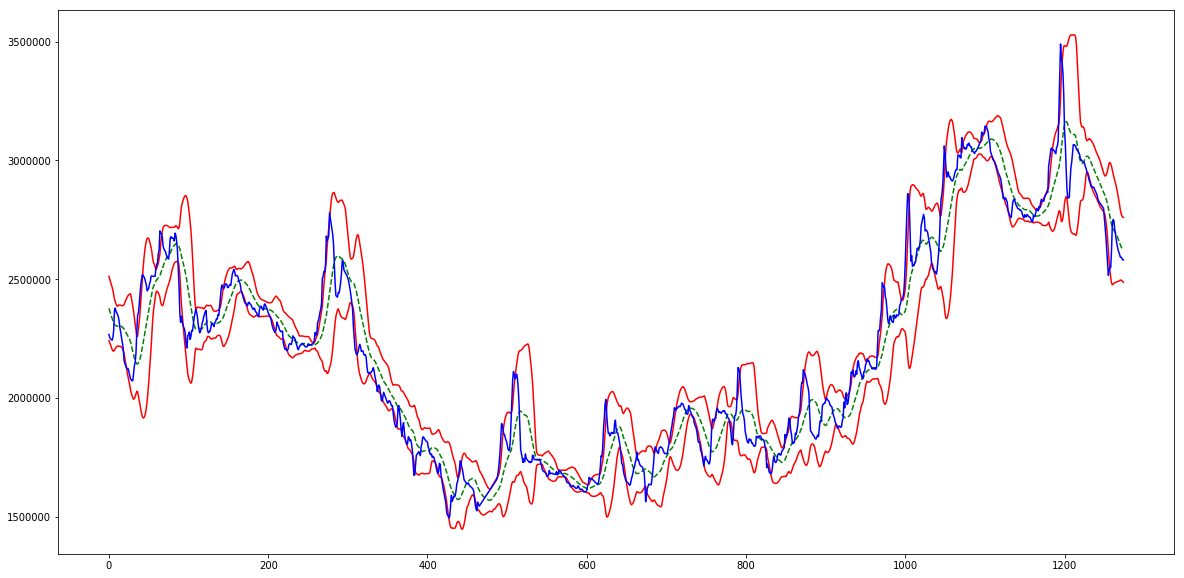

0.668390982455874


In [142]:
prices = [a[1] for a in itemPrices['Abyssal_whip']]
means,stds = bollingerBands(prices)
plotBollingerBands(prices,means,stds)
print(np.std(stds)/np.mean(stds))

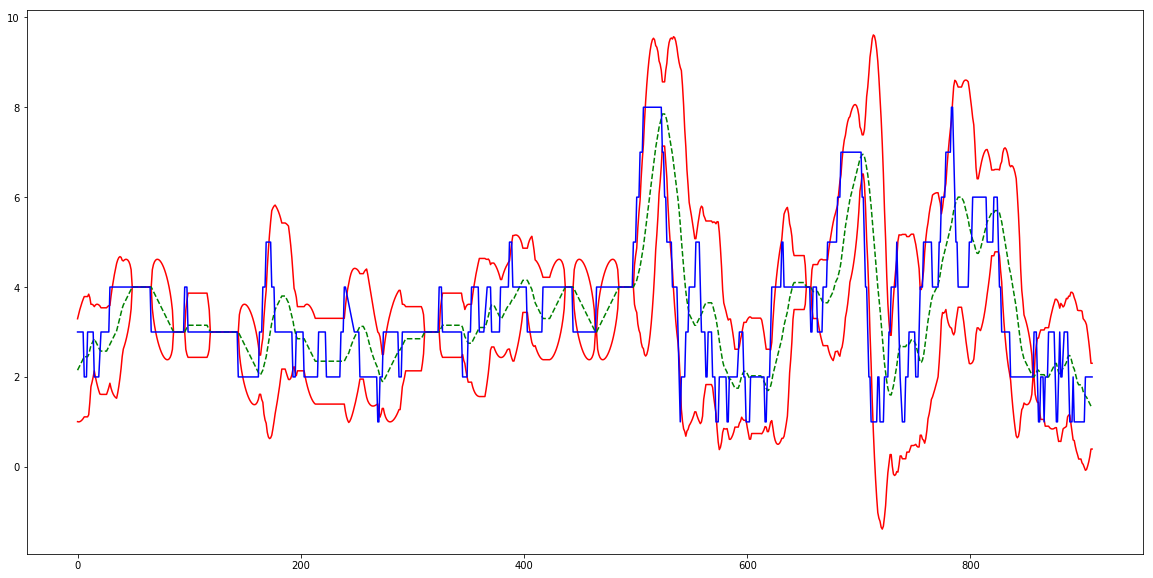

0.6794109100714467


In [143]:
prices = [a[1] for a in itemPrices['Body_tiara']]
means,stds = bollingerBands(prices)
plotBollingerBands(prices,means,stds)
print(np.std(stds)/np.mean(stds))

In [144]:
# want to try and get rid of items that just have one big peak

In [145]:
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [146]:
changes = {}
for item in viableItems:
    prices = [a[1] for a in itemPrices[item][-90:]]
    ma = moving_average(prices,7)
    slope = (ma[1]-ma[0])>=0
    c = 0
    for i in range(1,len(ma)-1):
        if ma[i+1]-ma[i]>=0 and not slope:
            c += 1
            slope = True
        elif ma[i+1]-ma[i]<0 and slope:
            c+=1
            slope = False
    changes[item] = c

[('Mind_bomb(m4)', 0),
 ("Relicym's_mix(1)", 0),
 ('Steel_bolts_(p)', 0),
 ('Moonlight_mead', 0),
 ('Sliced_mushrooms', 0),
 ('Zamorak_mix(1)', 0),
 ('Mahogany_armour_case', 0),
 ('Mint_cake', 0),
 ('White_dagger(p++)', 0),
 ('Silver_bolts_(p+)', 0)]
[('Rune_mace', 39),
 ('Mystic_lava_staff', 39),
 ('Rock-shell_legs', 36),
 ('Mystic_earth_staff', 36),
 ('Adamant_platelegs', 35),
 ('Rune_spear', 35),
 ('Shield_left_half', 34),
 ("Blue_d'hide_chaps", 34),
 ('Runite_crossbow_(u)', 33),
 ('Fire_battlestaff', 33)]


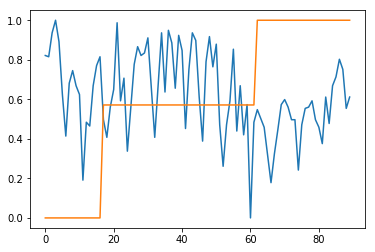

In [147]:
changesSorted = sorted(changes.items(), key=lambda kv: kv[1],reverse=True)
pprint(changesSorted[-10:])
pprint(changesSorted[:10])
scaler = MinMaxScaler()
plt.plot(scaler.fit_transform(np.array([a[1] for a in itemPrices[changesSorted[0][0]][-90:]]).reshape(-1, 1)))
plt.plot(scaler.fit_transform(np.array([a[1] for a in itemPrices[changesSorted[-100][0]][-90:]]).reshape(-1, 1)))
plt.show()

In [148]:
# look at size of quantity data set
sizes = {}
for item in changes:
    l = changes[item]
    if l in sizes:
        sizes[l] +=1
    else:
        sizes[l] = 1
cumSum = 0
cumSums = []
keys = []
for key in sorted(sizes):
    print("%s: %s" % (key, sizes[key]))
    keys.append(key)
    cumSum += sizes[key]
    cumSums.append(cumSum)
cumSums = np.array(cumSums)/cumSum

0: 275
1: 76
2: 117
3: 143
4: 171
5: 198
6: 221
7: 231
8: 216
9: 200
10: 150
11: 135
12: 127
13: 86
14: 68
15: 45
16: 34
17: 23
18: 16
19: 23
20: 13
21: 15
22: 6
23: 8
24: 18
25: 7
26: 3
27: 1
28: 6
29: 6
30: 4
32: 1
33: 7
34: 2
35: 2
36: 2
39: 2


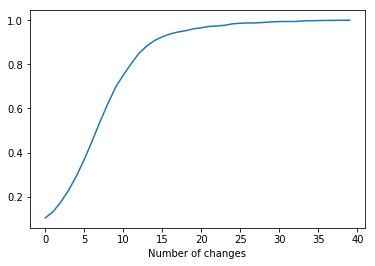

In [149]:
plt.plot(keys,cumSums)
plt.xlabel('Number of changes')
plt.gca()

In [150]:
print(len(viableItems))
viableItems = [a for a in viableItems if changes[a]>3]
print(len(viableItems))

2658
2047


In [151]:
def perfectProfit(data,buyLimit):
    buyLimit = int(buyLimit)
    buyers = [10**5,10**6,10**7,10**8,10**9,10**10]
    invent = [0] * len(buyers)
    for i in range(1,len(data)):
        if data[i]>data[i-1]:
            for b in range(len(buyers)):
                buy = buyers[b]//data[i-1]
                if buy>buyLimit:
                    buy = buyLimit
                invent[b] += buy
                buyers[b] -= buy * data[i-1]
        elif data[i]<data[i-1]:
            for b in range(len(buyers)):
                buyers[b] += invent[b] * data[i-1]
                invent[b] = 0
    for b in range(len(buyers)):
        buyers[b] += invent[b] * data[i]
    init = [10**5,10**6,10**7,10**8,10**9,10**10]
    return [(buyers[i]-init[i])/init[i] for i in range(len(buyers))]

def buyAndHold(data,buyLimit):
    buyLimit = int(buyLimit)
    buyers = [10**5,10**6,10**7,10**8,10**9,10**10]
    invent = [0] * len(buyers)
    for b in range(len(buyers)):
        buy = buyers[b]//data[0]
        if buy>buyLimit:
            buy = buyLimit
        invent[b] += buy
        buyers[b] -= buy * data[0]
    for b in range(len(buyers)):
        buyers[b] += invent[b] * data[-1]
    init = [10**5,10**6,10**7,10**8,10**9,10**10]
    return [(buyers[i]-init[i])/init[i] for i in range(len(buyers))]

In [152]:
item = 'Abyssal_whip'
print(itemInfo[item])
bl = int(itemInfo[item]['buyLimit'])
prices = [a[1] for a in itemPrices[item]]
print(perfectProfit(prices[-90:],bl))
print(buyAndHold(prices[-90:],bl))

{'image': '/w/File:Abyssal_whip.png', 'equipable': 'True', 'seller': 'N/A', 'update': '/w/Update:Slayer_Skill', 'noteable': 'True', 'tradeable': 'True', 'name': 'Abyssal_whip', 'highAlch': '72000', 'exchangePrice': '2622266', 'quest': 'No', 'storeCurrency': 'N/A', 'lowAlch': '48000', 'members': 'True', 'alchable': 'True', 'edible': 'False', 'released': '26 January 2005', 'storeprice': 'N/A', 'stackable': 'False', 'buyLimit': '70', 'destroy': 'Drop', 'examine': 'A weapon from the abyss.', 'weight': '0.453'}
[0.0, 0.0, 0.3252564, 0.36046365, 0.216476323, 0.023374232]
[0.0, 0.0, -0.1382502, -0.14746688, -0.03225838, -0.003225838]


In [153]:
profits = {}
bAndH = {}
total = {}
j = 0
for item in viableItems:
    try:
        prices = [a[1] for a in itemPrices[item][-90:]]
        profits[item] = perfectProfit(prices,itemInfo[item]['buyLimit'])
        bAndH[item] = buyAndHold(prices,itemInfo[item]['buyLimit'])
        total[item] = []
        for i in range(len(bAndH[item])):
            if bAndH[item][i]!=0:
                total[item].append((profits[item][i]-bAndH[item][i])/bAndH[item][i])
            else:
                total[item].append(0.0)
    except ValueError:
        print(item)

Dark_bow
Bullseye_lantern
Oil_lamp
Dragonfire_shield
Small_fishing_net
Gilded_scimitar


In [154]:
for b in range(5):
    print(10**(5+b))
    p = sorted(profits.items(), key=lambda kv: kv[1][b],reverse=True)
    bAH = sorted(bAndH.items(), key=lambda kv: kv[1][b],reverse=True)
    t = sorted(total.items(), key=lambda kv: kv[1][b],reverse=True)
    print('\tPerfect')
    for i in range(0,5):
        print('\t\t',p[i][0],p[i][1][b])
    print('\tBuy and Hold')
    for i in range(0,5):
        print('\t\t',bAH[i][0],bAH[i][1][b])
    print('\tTotal')
    for i in range(0,10):
        print('\t\t',t[i][0],t[i][1][b])

100000
	Perfect
		 Mind_talisman 7.64979
		 Coconut 6.47975
		 Raw_bird_meat 6.36635
		 Mushroom 5.93477
		 Potato 5.22453
	Buy and Hold
		 Raw_bird_meat 2.2
		 Coconut 2.09174
		 Silver_dust 1.339
		 Mushroom 1.3038
		 Mind_talisman 1.24202
	Total
		 Rune_kiteshield_(t) 2554.2000000000003
		 Elemental_shield 1096.5632183908044
		 Fire_orb 898.678082191781
		 Mystic_gloves 733.4901960784313
		 Tuna_potato 600.9277777777777
		 Initiate_harness_m 524.0833333333334
		 Mith_crossbow 500.6373333333334
		 Rune_battleaxe 414.99999999999994
		 Steel_pickaxe 342.84
		 Red_d'hide_body_(t) 334.2625
1000000
	Perfect
		 Mind_talisman 7.654684
		 Coconut 6.48872
		 Mushroom 5.855908
		 Mos_le'harmless_teleport 4.688595
		 Spice 4.5497985
	Buy and Hold
		 Coconut 2.098306
		 Ancient_chaps 1.411832
		 Karil's_leatherskirt_0 1.376244
		 Silver_dust 1.34017
		 Mushroom 1.305645
	Total
		 Rune_kiteshield_(t) 5028.58
		 Elemental_shield 2573.0523809523806
		 Mith_crossbow 1477.0586666666666
		 Fire_orb 89

In [155]:
changes['Rune_kiteshield_(t)']

5

In [156]:
with open('Data/viableItems.pickle','wb') as f:
    pickle.dump(viableItems,f)